In [ ]:
%pip install qiskit-ibm-runtime
%pip install qiskit_aer
%pip install qiskit
%pip install pylatexenc
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install pandas

In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex #https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer.primitives import Sampler as primSampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="0a36966977a20de04e025a331253d45c66f8f0139cbb352cb382c5cfee983a61ee15dc87df60f9d918d753e8009d52b1270f6e67f04e3ee4a09165246759aac1", set_as_default=True, overwrite=True)

In [3]:
service = QiskitRuntimeService()

In [4]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [12]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.x(1)
circuit.measure([0,1], [0,1])

In [13]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circuit, backend = simulator).result()
statevector = result.get_statevector()

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


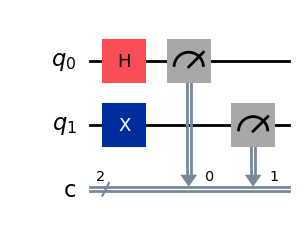

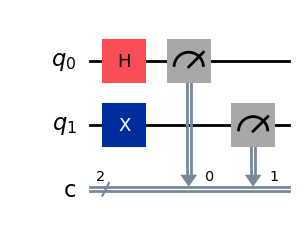

In [14]:
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

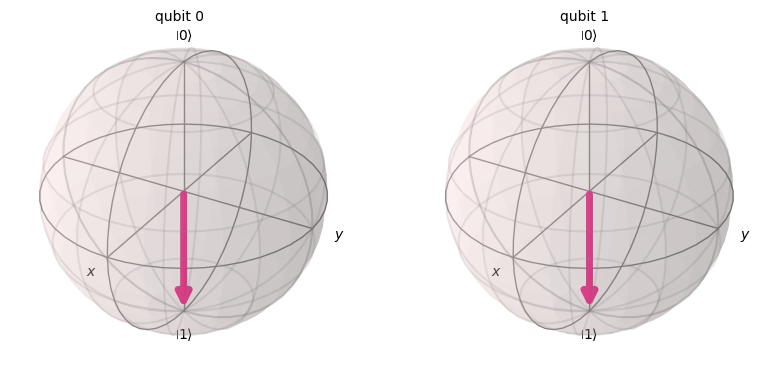

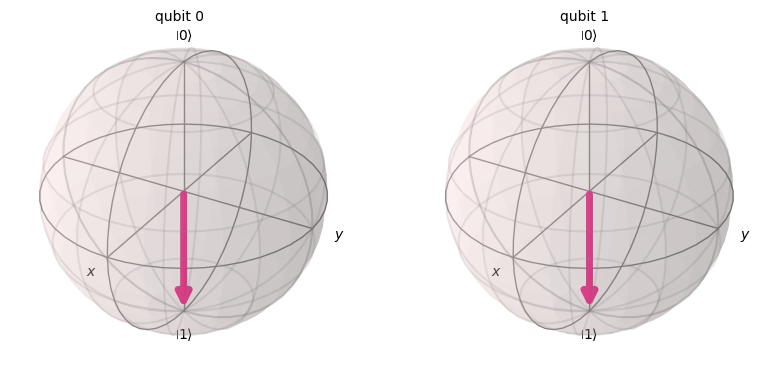

In [15]:
plot_bloch_multivector(statevector)

In [17]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, backend = backend)
result = simulator.run(transpiled_circuit, shots=2048).result()

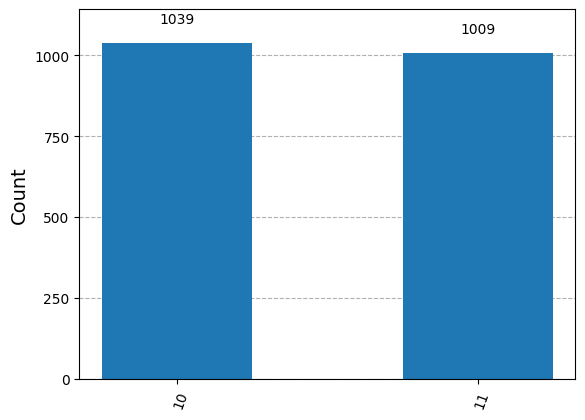

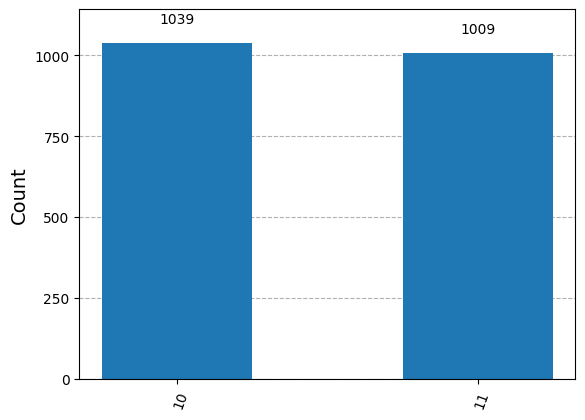

In [18]:
counts = result.get_counts()
plot_histogram(counts)

In [30]:
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
transpiled_circuit = transpile(circuit, backend=backend)

In [ ]:
job = Sampler(backend).run([transpiled_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cyz8fw7dpp2g00848h00


In [ ]:
# Extract the BitArray from the SamplerPubResult
bit_array = result[0].data.c  # Access the 'c' field of DataBin

# Convert BitArray to counts dictionary
# Use get_counts() if available, otherwise manually count
try:
    # Attempt to use built-in method if available (depends on Qiskit version)
    counts = bit_array.get_counts()
except AttributeError:
    # Manual counting as fallback
    counts = {'0': 0, '1': 0}
    # Assuming single qubit, access the binary data directly
    for shot in bit_array.array:  # Use .array to access raw data
        outcome = str(shot)  # Convert to string ('0' or '1')
        counts[outcome] = counts.get(outcome, 0) + 1

# Prepare data for plotting
states = list(counts.keys())
values = list(counts.values())

# Plot histogram
plt.bar(states, values, color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.title('Measurement Results from IBM Brisbane')
plt.show()